In [40]:
from __future__ import division
import numpy as np

# Generate the data according to the specification in the homework description

N = 10000

# Here's an estimate of gamma for you
G = lambda x: np.log(np.cosh(x))
gamma = np.mean(G(np.random.randn(10**6)))

s1 = np.sin((np.arange(N)+1)/200)
s2 = np.mod((np.arange(N)+1)/200, 2) - 1
S = np.concatenate((s1.reshape((1,N)), s2.reshape((1,N))), 0)

A = np.array([[1,2],[-2,1]])

X = A.dot(S)

# TODO: Implement ICA using a 2x2 rotation matrix on a whitened version of X

In [41]:
def w(theta):
    w=np.matrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    return w

In [49]:
(U,V,A)=np.linalg.svd(np.dot(X,X.T))
X1=np.dot(np.dot(np.linalg.inv(A),U.T)*np.sqrt(N),X)

In [50]:
def J(theta,X):
    a=np.dot(w(theta),X)
    J=(np.mean(G(a[0,:]))-gamma)**2+(np.mean(G(a[1,:]))-gamma)**2
    return J

In [51]:
the=np.linspace(0,np.pi/2,200)

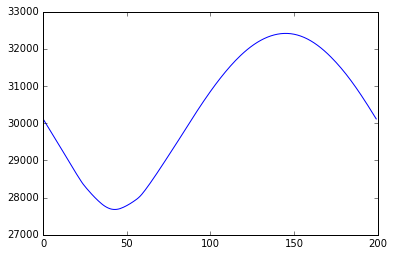

In [52]:
Error=np.zeros(200)
for i in range(200):
    Error[i]=J(the[i],X1)
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(Error)

145


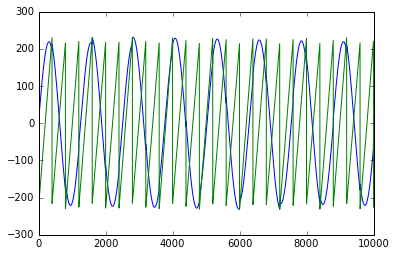

In [55]:
ww=np.argmax(Error)
print ww
y=np.dot(w(the[145]),X1)
y1=y[0,:].T
plt.plot(y1)
y2=y[1,:].T
plt.plot(y2)

In [56]:
X1.shape

(2L, 10000L)